In [1]:
#Input NPM
NPM = "1806235896"

#Input NPM teman yang berkolaborasi dengan Anda dalam mengerjakan tugas ini
KOLABORATOR = []

#Input link referensi atau sumber lain yang Anda gunakan dalam menyelesaikan tugas ini
REFERENSI = [
    "https://scipy.github.io/devdocs/generated/scipy.special.softmax.html",
    "https://medium.com/@ducalpha/ml-basics-backward-propagation-in-a-dense-layer-d61d6043f7e7",
    "https://stats.stackexchange.com/questions/219241/gradient-for-logistic-loss-function"
]

In [2]:
#Jika ingin memakai colab
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# path = '/content/gdrive/My Drive/'

## PR 2 Linear Network, Multi Layer Perceptron

#### Tugas ini terdiri dari 2 bagian:

* Bagian 1: Implementasi (Score: 70)
    * [Soal 1 - Implementasi Single Layer NN](#Soal-1)
    * [Soal 2 - Implementasi Loss Function](#Soal-2)
    * [Soal 3 - Implementasi Optimizer](#Soal-3)
    * [Soal 4 - Analisis](#Soal-5)
* Bagian 2: Demo program (Score: 30) (mekanisme demo akan diumumkan lebih lanjut via Scele)
* Dataset yang digunakan adalah <b>fashion-mnist.csv</b>. Anda diminta untuk mengimplementasikan Neural Network untuk memprediksi atribut <b>kategori</b>. Data yang digunakan memiliki 785 atribut, yaitu pixel1 sampai pixel784 yang merepresentasikan pixel-pixel dari gambar fashion, dan kategori. 


In [3]:
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import time
import traceback
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

### Dataset Fashion
* Pada PR ini Anda diminta untuk mengimplementasikan Neural Network untuk memprediksi kategori pada data fashion
* Data yang digunakan memiliki 785 atribut, yaitu pixel1 sampai pixel784 yang merepresentasikan pixel-pixel dari gambar fashion, dan kategori. Atribut yang akan diprediksi adalah kategori

In [4]:
df = pd.read_csv("fashion-mnist.csv")
df.head()

,kategori,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Pemisahan fitur dan target
features = df.drop(["kategori"], axis=1).values
target = df["kategori"].values

In [6]:
# Preprocessing data

In [7]:
encoder = OneHotEncoder(categories='auto')
X, y = features, encoder.fit_transform(target.reshape(-1,1)).todense().astype(np.uint8)
X.shape

(60000, 784)

## Soal 1 
### Implementasi Single Layer NN (25 poin)

* Pada soal ini Anda diminta untuk mengimplementasikan Activation Layer (Sigmoid dan Softmax) dan Dense Layer dari Neural Network

In [8]:
class Layer:
    """
    building block of a layer in creating a layer in NN
    """
    def __init__(self):
        pass
    
    def forward(self, _input):
        """
        takes input in shape of [batch, input_units]
        return output shape  of[batch, output_units]
        """
        return _input

    def backward(self, _input, grad_output):
        """
        Performs a backpropagation step through the layer, with respect to the given input.
        """
        return [np.dot(grad_output, _input)]

### Activation Layer

* Activation Layer yang diminta untuk diimplementasi meliputi Sigmoid dan Stable Softmax
* Activation Layer dapat didefinisikan seperti persamaan di bawah ini
  $$a^{[l]} = g(z^{[l]})$$ dimana g adalah non-linear function (misalnya tanh, relu, sigmoid) dan z adalah input

### Relu

In [9]:
class Relu(Layer):
    def __init__(self):
        pass
    
    def forward(self, _input):
        return np.maximum(0, _input)
    
    def backward(self, _input, grad_output):
        """
        relu gradient is a step function (1 if input > 0 else 0)
        """
        relu_grad = _input > 0
        return [grad_output*relu_grad]

In [10]:
relu = Relu()

In [11]:
# example of X with 5 features and 10 example
x = np.linspace(-1,1,2*5).reshape([5,2])
x.shape

(5, 2)

In [12]:
x

array([[-1.        , -0.77777778],
       [-0.55555556, -0.33333333],
       [-0.11111111,  0.11111111],
       [ 0.33333333,  0.55555556],
       [ 0.77777778,  1.        ]])

In [13]:
relu.forward(x)

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.11111111],
       [0.33333333, 0.55555556],
       [0.77777778, 1.        ]])

In [14]:
# to compute its gradient we can just specify
# relu.backward(x, np.ones(x.shape))
# it will tell you that dx / d(what ever) = 1
# so that it will compute d (what ever) / d(relu) = (d relu / dx) * (dx / d(what ever))
# = d (what ever) / d(relu) = (d relu / dx) * 1
# = d (what ever) / d(relu) = (d relu / dx)
relu.backward(x, np.ones(x.shape))

[array([[0., 0.],
        [0., 0.],
        [0., 1.],
        [1., 1.],
        [1., 1.]])]

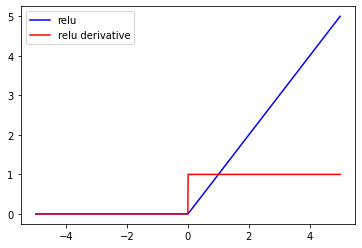

In [15]:
# Playground
x = np.linspace(-5,5, 1000).reshape(-1, 1000)
plt.plot(x[0], relu.forward(x)[0], 'b', x[0], relu.backward(x, np.ones(x.shape))[0][0], 'r')
plt.legend(['relu', 'relu derivative'], loc='best')
plt.show()

### Sigmoid

In [16]:
class Sigmoid(Layer):
    
    def __init__(self):
        pass

    def forward(self, _input):
        return 1 / (1 + np.exp(-1* _input))
        
    def backward(self, _input, grad_output):
        sigmoid_grad = self.forward(_input) * (1 - self.forward(_input))
        return [grad_output*sigmoid_grad]

In [17]:
sigmoid = Sigmoid()
np.testing.assert_almost_equal(sigmoid.forward(np.array([[-99,-99], [0,0],[1,1], [99,99]])), np.array([[0, 0], [0.5,0.5], [0.7310586,0.7310586], [1, 1]]))

np.testing.assert_almost_equal(sigmoid.backward(np.array([[-99,-99], [99,99]]), np.ones((2,2)))[0], np.array([[0,0], [0, 0]]))
np.testing.assert_almost_equal(sigmoid.backward(np.array([[1, 1], [0,0]]), np.ones((2,2)))[0], np.array([[0.1966119, 0.1966119], [0.25, 0.25]]))


In [18]:
sigmoid = Sigmoid()
np.testing.assert_almost_equal(sigmoid.forward(np.array([[-99,-99], [0,0],[1,1], [99,99]])), np.array([[0, 0], [0.5,0.5], [0.7310586,0.7310586], [1, 1]]))

np.testing.assert_almost_equal(sigmoid.backward(np.array([[-99,-99], [99,99]]), np.ones((2,2)))[0], np.array([[0,0], [0, 0]]))
np.testing.assert_almost_equal(sigmoid.backward(np.array([[1, 1], [0,0]]), np.ones((2,2)))[0], np.array([[0.1966119, 0.1966119], [0.25, 0.25]]))


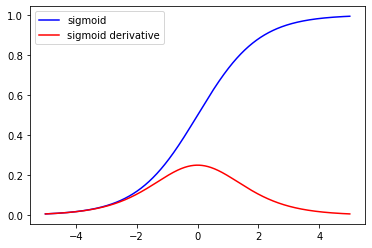

In [19]:
#playground
x = np.linspace(-5,5, 1000).reshape(-1, 1000)
plt.plot(x[0], sigmoid.forward(x)[0], 'b', x[0], sigmoid.backward(x, np.ones(x.shape))[0][0], 'r')
plt.legend(['sigmoid', 'sigmoid derivative'], loc='best')
plt.show()

### Softmax

In [20]:
np.exp(100)

2.6881171418161356e+43

In [21]:
softmax = lambda x: np.exp(x) / np.sum(np.exp(x))
softmax([0, 1, 5])

array([0.00657326, 0.01786798, 0.97555875])

In [22]:
softmax = lambda x: np.exp(x) / np.sum(np.exp(x))
softmax(np.array([[100],[1],[0]]))

array([[1.00000000e+00],
       [1.01122149e-43],
       [3.72007598e-44]])

In [23]:
softmax([0, 1000, 5000])

<ipython-input-22-213dec9b9fd3>:1: RuntimeWarning: overflow encountered in exp
  softmax = lambda x: np.exp(x) / np.sum(np.exp(x))
<ipython-input-22-213dec9b9fd3>:1: RuntimeWarning: invalid value encountered in true_divide
  softmax = lambda x: np.exp(x) / np.sum(np.exp(x))


array([ 0., nan, nan])

### Stable Softmax

* Masalah yang dapat dilihat pada softmax adalah hasil dari softmax tidak stabil ketika input yang diberikan terlalu besar (jarang terjadi tetapi mungkin dapat terjadi jika menggunakan relu activation function).
* Oleh karena itu, diperlukan softmax yang lebih stabil terhadap besarnya input yang diberikan.
* Untuk membuat stable softmax, kita dapat menggeser nilai maks mendekati 0

In [24]:
class Softmax(Layer):
    
    def __init__(self):
        pass

    def forward(self, _input, axis=1): 
        x = _input - np.expand_dims(np.max(_input, axis = axis), axis)
        x = np.exp(x)
        
        ax_sum = np.expand_dims(np.sum(x, axis = axis), axis)
        
        p = x / ax_sum
        
        return p
        
        # source : https://scipy.github.io/devdocs/generated/scipy.special.softmax.html
    
    def backward(self, _input, grad_output):
        return [grad_output]

In [25]:
softmax = Softmax()
np.testing.assert_almost_equal(softmax.forward(np.array([[100],[1],[0]])), np.array([[1],[1],[1]]))
np.testing.assert_almost_equal(softmax.forward(np.array([[100,3000],[1,1],[0,1]])), np.array([[0,1],[0.5,0.5],[0.2689414, 0.7310586]]))

## Dense

* single dense layer untuk **forward propagation** dapat didefinisikan seperti di bawah ini 
$$z^{[l]} = W^{[l]}*a^{[l-1]} + b^{[l]} $$  dengan $a^{[l-1]}$ merupakan input untuk forward function (Anda dapat mendapatkannya dari parameter _input)


* single dense layer untuk **backward propagation** dapat didefinisikan seperti di bawah ini

    misalkan Anda sudah menghitung $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$ dan Anda ingin menghitung $da^{[l-1]} , dW^{[l]}, db^{[l]}$

    yang perlu Anda lakukan hanyalah menghitung

    $da^{[l-1]}= \frac{\partial \mathcal{L} }{\partial a^{[l-1]}} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}} * \frac{\partial Z^{[l]} }{\partial a^{[l-1]}} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}} * \frac{\partial (W^{[l]}*a^{[l-1]} + b^{[l]}) }{\partial a^{[l-1]}} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}} . W^{[l]}$

    $dW^{[l]}= \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}} * \frac{\partial Z^{[l]} }{\partial W^{[l]}} = $ ?

    $db^{[l]}= \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}} * \frac{\partial Z^{[l]} }{\partial b^{[l]}} = $ ?

    **REMINDER: NN yang kita gunakan memiliki shape [batch , input_unit ]. Oleh karena itu Anda harus menggunakan semua training example dalam suatu batch untuk menghitung gradien.**
    
    dengan $a^{[l-1]}$ dan $\frac{\partial \mathcal{L} }{\partial Z^{[l]}}$ merupakan input untuk backward function (Anda dapat mendapatkannya dari parameter _input dan parameter grad_output)


In [26]:
class Dense(Layer):
    def __init__(self, input_shape, output_shape, weight_initializer='random'):

        if weight_initializer not in ['xavier','random']:
            raise ValueError('weight_initializer must be either xavier or random')

        if weight_initializer == 'random':
            self.weights = np.random.randn(input_shape, output_shape)*1e-2
        
        elif weight_initializer == 'xavier':
            self.weights = np.random.randn(input_shape, output_shape)*np.sqrt(2/(input_shape + output_shape))
        
        self.bias = np.random.randn(output_shape)
    

    def forward(self, _input):
        return _input.dot(self.weights) +  self.bias
        
    def backward(self, _input, grad_output):
        grad_input = grad_output.dot(self.weights.T)
        grad_weights = np.zeros(self.weights.shape)
        grad_bias = np.zeros(self.bias.shape)
        
        for i in range(_input.shape[0]):
            grad_weights += np.outer(_input[i], grad_output[i])
            grad_bias += grad_output[i]
        
        return [grad_input, grad_weights, grad_bias]

In [27]:
np.random.seed(3)
dense = Dense(2,2)
dense.weights = np.ones((2,2))
dense.bias = np.zeros(2)
dense.backward(np.array([[1,1]]), np.array([[1,1]]))

[array([[2., 2.]]),
 array([[1., 1.],
        [1., 1.]]),
 array([1., 1.])]

In [28]:
np.random.seed(3)
dense = Dense(2,2)
np.testing.assert_almost_equal(dense.forward(np.ones([3,2])), np.array([[-0.25853694, -0.36902881], [-0.25853694, -0.36902881],[-0.25853694, -0.36902881]]))

In [29]:
np.random.seed(3)
dense = Dense(2,2)
np.testing.assert_almost_equal(dense.forward(np.ones([3,2])), np.array([[-0.25853694, -0.36902881], [-0.25853694, -0.36902881],[-0.25853694, -0.36902881]]))

dense.weights = np.ones((2,2))
dense.bias = np.zeros(2)
backprop = dense.backward(np.array([[1,1]]), np.array([[1,1]]))
np.testing.assert_almost_equal(backprop[0], np.array([[2., 2.]]))
np.testing.assert_almost_equal(backprop[1], np.array([[1., 1.], [1., 1.]]))
np.testing.assert_almost_equal(backprop[2], np.array([1., 1.]))

assert dense.weights.shape == backprop[1].shape
assert dense.weights.shape[0] == backprop[0].shape[1]

## Soal 2
### Implementasi Loss Function (25 poin)

* Pada soal ini Anda diminta untuk mengimplementasikan Binary Log Loss dan Softmax Cross Entropy Loss

## Binary Log Loss

* Anda diminta untuk menghitung binary log loss function untuk m sample and gradiennya


In [30]:
def binary_log_loss(y_true, y_pred):
    """
        input: y_true, y_pred (numpy array with shape [batch_size, 1])
        output: bin_log_loss (numpy float64)
                bin_log_loss_grad (numpy array with shape [batch_size, 1])
    """
    
    N = len(y_true)
    summed = 0
    bin_log_loss_grad = []
    for i in range(N):
        
        y = y_true[i]
        y_hat = y_pred[i]
        
        
        summed += y*math.log(y_hat) + (1-y)*(math.log(1 - y_hat))
        diff = y-y_hat
        bin_log_loss_grad.append((-1/(y_hat*(1-y_hat)))*diff)
        
        
    bin_log_loss = (-1/N) * summed
    return bin_log_loss, bin_log_loss_grad

def sigmoid_func(x):
    return 1 / (1 + math.e**(-1* x))


# dont worry about this we will use it later
def binary_log_loss_with_sigmoid(layer_input_output_cache, y_true):
    return binary_log_loss(layer_input_output_cache[-1], y_true)

In [31]:
loss, grad = binary_log_loss(np.array([[1],[0]]),np.array([[1-1e-9],[0+1e-9]]))

np.testing.assert_almost_equal(loss, 0)
np.testing.assert_almost_equal(grad[0], -1)
np.testing.assert_almost_equal(grad[1], 1)

loss, grad = binary_log_loss(np.array([[1]]),np.array([[0.5]]))
np.testing.assert_almost_equal(loss, np.log(2))
assert grad[0][0] == -2

## Softmax Cross Entropy Loss

* Rumus cross entropy loss untuk single example adalah sebagai berikut
$$L(y^{true}, y^{pred}) = - \sum\limits_{j=1}^k y_j^{true} log(y_j^{pred})$$

* Sedangkan rumus cross entropy loss untuk single batch adalah sebagai berikut

  $$L(y^{true}, y^{pred}) =  \frac{-1}{m} \sum\limits_{i=1}^m \sum\limits_{j=1}^k y_{i,j}^{true} log(y_{i,j}^{pred})$$ dimana m merupakan jumlah data dalam single batch

In [32]:
def softmax_cross_entropy(y_true, y_pred):
    M = y_true.shape[0]
    log_likelihood = -np.log(y_pred)*y_true
    softmax_cross_entropy_loss = np.sum(log_likelihood) / M
#     result = 0
#     for i in range(M):
#         y = y_true[i]
#         y_hat = y_pred[i]
#         K = len(y)
#         for j in range(K):
#             try:
#                 result += y[j] * math.log(y_hat[j])
#             except:
#                 print(y_hat[j])
#                 raise Exception
#     softmax_cross_entropy_loss = (-1/M) * result
    
    softmax_cross_entropy_grad = y_pred - y_true
    return softmax_cross_entropy_loss, softmax_cross_entropy_grad

# dont worry about this we will use it later
def softmax_cross_entropy_with_logits(layer_input_output_cache, y_true, softmax=Softmax()):
    logits = layer_input_output_cache[-1]
    y_pred = softmax.forward(logits)
    return softmax_cross_entropy(y_true, y_pred)

In [33]:
np.array([[1,0],[0,1]])

array([[1, 0],
       [0, 1]])

In [34]:
softmax_cross_entropy(np.array([[1,0],[0,1]]),np.array([[1-1e-9,0+1e-9],[1+1e-9,1-1e-9]]))

(9.999999722180686e-10,
 array([[-9.99999972e-10,  1.00000000e-09],
        [ 1.00000000e+00, -9.99999972e-10]]))

In [35]:
loss, _ = softmax_cross_entropy(np.array([[1,0],[0,1]]),np.array([[1-1e-9,0+1e-9],[1+1e-9,1-1e-9]]))
np.testing.assert_almost_equal(loss, 0)

loss, _ = softmax_cross_entropy(np.array([[1,0],[0,1],[0,1]]),np.array([[0.5,0.5],[0.5,0.5],[0.5,0.5]]))
np.testing.assert_almost_equal(loss, np.log(2))

loss, _ = softmax_cross_entropy(np.array([[1,0,0],[0,1,0],[0,0,1]]),np.array([[0.5,0.25,0.25],[0.5,0.25,0.25],[0.25,0.25,0.5]]))
np.testing.assert_almost_equal(loss, 0.9241962407465937)

## Soal 3
### Optimizer (10 poin)

* Pada soal ini Anda diminta untuk mengimplementasikan update layer pada Momentum Optimizer

In [36]:
class Optimizer:
    def __init__(self, model, loss_func):
        self.model = model
        self.loss_func = loss_func
    
    
    def update_layer(self, layer, weight, bias):
        raise NotImplementedError

    # forward propagation    
    def _forward(self, _input):
        #cache the input and output to use later
        layer_input_output_cache = [_input]   
        
        #forward propagate for each layer
        for layer in self.model.layers:
            _input = layer.forward(_input)
            layer_input_output_cache.append(_input)
        
        return layer_input_output_cache
    
    def _backward(self, layer_input_output_cache, output_grad):
        # reverse loop
        for j in range(len(self.model.layers))[::-1]:

            layer = self.model.layers[j]

            # list of gradient
            D_list = layer.backward(layer_input_output_cache[j], output_grad)

            # update output grad and
            if len(D_list) > 1:
                # if contain weight and bias update this layer bias and weight
                [output_grad, weight, bias] = D_list
                self.update_layer(layer, weight, bias)
            else:
                output_grad = D_list[0]
    
    def fit(self, X_train, y_train ,X_val=None, y_val=None,n_epoch=100, batch_size=None):

        if batch_size is None:
            batch_size = X_train.shape[0]

        total_m_train= X_train.shape[0]

        
        use_val = X_val is not None
        if use_val:
            total_m_val = X_val.shape[0]

        # we are using the definition of epoch as 1 iteration to all training example
        history_train = []
        history_val = []

        for epoch in range(n_epoch):

            p_bar = tqdm(total=int(total_m_train/batch_size) + 1 if total_m_train%batch_size != 0 else 0)
            try:
                p_bar.set_description('epoch {}: {}/{} loss: inf'.format(epoch+1, 0, total_m_train))

                history_per_batch = []
                for i in (range(0, total_m_train, batch_size)):

                    #separate each set to minibatches
                    adjusted_batch_size = min(i+batch_size, total_m_train)
                    X_batch_train = X_train[i:adjusted_batch_size]
                    y_batch_train = y_train[i:adjusted_batch_size]


                    # forward propagate
                    layer_input_output_cache = self._forward(X_batch_train)

                    # compute its loss and grad
                    loss, output_grad = self.loss_func(layer_input_output_cache, y_batch_train)
                    # report current progress
                    history_per_batch.append(loss)

                    p_bar.set_description('epoch {}: {}/{} loss: {:4f}'.format(epoch+1, adjusted_batch_size, total_m_train, loss))
                    p_bar.update(1)
                    
                    # backward propagation
                    self._backward(layer_input_output_cache, output_grad)
                history_train.append(history_per_batch)

                train_loss_mean = np.mean(history_per_batch)
                val_loss_mean = None

                if use_val:
                    history_per_batch = []
                    for i in (range(0, total_m_val, batch_size)):

                        #separate each set to minibatches
                        adjusted_batch_size = min(i+batch_size, total_m_val)
                        X_batch_val = X_val[i:adjusted_batch_size]
                        y_batch_val = y_val[i:adjusted_batch_size]

                        # forward propagate
                        layer_input_output_cache = self._forward(X_batch_val)
                        loss, output_grad = self.loss_func(layer_input_output_cache, y_batch_val)

                        history_per_batch.append(loss)
                    history_val.append(history_per_batch)

                    val_loss_mean = np.mean(history_per_batch)
                val_report = ''
                if val_loss_mean is not None:
                    val_report = 'val: {:4f}'.format(val_loss_mean)
                p_bar.close()
                time.sleep(0.2)
                print('\tmean epoch {} loss: train: {:4f}'.format(epoch+1, train_loss_mean),val_report)
                time.sleep(0.2)
            except Exception as e:
                p_bar.close()
                traceback.print_stack()
                raise Exception(e)
                

        return history_train, history_val

## Gradient Descent Optimizer

In [37]:
class GradientDescentOptimizer(Optimizer):
    def __init__(self, model, loss_func, learning_rate=1e-4):
        super().__init__(model, loss_func)
        self.learning_rate = learning_rate
    
    def update_layer(self,layer, grad_weights, grad_bias):
        layer.weights = layer.weights - self.learning_rate * grad_weights
        layer.bias = layer.bias - self.learning_rate * grad_bias

## Momentum Optimizer

In [38]:
class MomentumOptimizer(Optimizer):
    def __init__(self, model, loss_func, learning_rate=1e-4, beta=0.9):
        super().__init__(model, loss_func)
        self.learning_rate = learning_rate
        self.beta = beta
        self.__reset_velocity()
    
    def __reset_velocity(self):
        self.velocity = {}
    
    def update_layer(self, layer, grad_weights, grad_bias):
        # initialize velocity to zero
        if id(layer) not in self.velocity:
            self.velocity[id(layer)] = 0
        
        self.velocity[id(layer)]  = self.beta*self.velocity[id(layer)] + (1-self.beta)*grad_weights
        layer.weights = layer.weights - self.learning_rate*self.velocity[id(layer)] 
        
        
        layer.bias = layer.bias - self.learning_rate * grad_bias

In [39]:
dense = Dense(1,2)
dense.weights = np.array([[1, 0]])
dense.bias = np.array([[1, 0]])
mom = MomentumOptimizer(None, lambda x:x, learning_rate=0.1,beta=0.5)

mom.update_layer(dense,1,1)
expected_velocity = 0.5
expected_weight = np.array([[0.95, -0.05]])
np.testing.assert_almost_equal(dense.weights, expected_weight)
assert mom.velocity[id(dense)] == expected_velocity

mom.update_layer(dense,0,0)
expected_velocity = 0.25
expected_weight = np.array([[0.925, -0.075]])
np.testing.assert_almost_equal(dense.weights, expected_weight)
assert mom.velocity[id(dense)] == expected_velocity

In [40]:
#Playground
dense_mom = Dense(1,1)
dense_gd = Dense(1,1)
dense_mom.weights = np.array([[1]])
dense_gd.weights = np.array([[1]])


mom = MomentumOptimizer(None, lambda x:x, learning_rate=1e-4)
gd = GradientDescentOptimizer(None, lambda x:x, learning_rate=1e-4)
gd_history = [1]
mom_history = [1]
velocities = []


# lets say in this part of training phase the gradient is spiky (sometimes 1 sometimes -1)
for k in range(10):
    for i in range(10-k):
        mom.update_layer(dense_mom,-1*(-1 if i%(k+2) else 1) , 1)
        gd.update_layer(dense_gd,-1*(-1 if i%(k+2) else 1) , 1)
        gd_history.append(dense_gd.weights[0][0])
        mom_history.append(dense_mom.weights[0][0])
    
# smooth part of the gradient
for i in range(15):
    mom.update_layer(dense_mom,-0.5/(i+1),1)
    gd.update_layer(dense_gd,-0.5/(i+1),1)
    gd_history.append(dense_gd.weights[0][0])
    mom_history.append(dense_mom.weights[0][0])

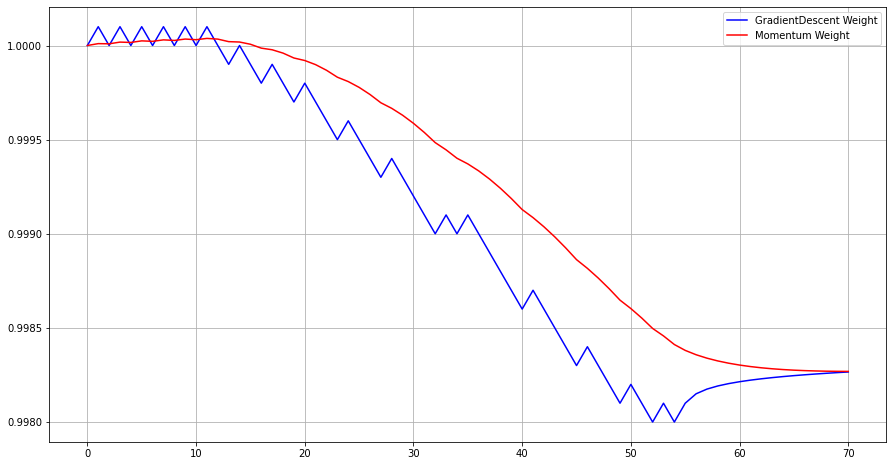

In [41]:
plt.figure(figsize=(15,8))
_iter = list(range(len(gd_history)))
plt.plot(_iter, gd_history, 'b', _iter, mom_history, 'r')
plt.grid()
plt.legend(['GradientDescent Weight', 'Momentum Weight'], loc='best')

## Sequential Model

In [42]:
class Sequential:
    def __init__(self):
        self.layers = []
    
    def append(self, layer):
        assert isinstance(layer, Layer)
        self.layers.append(layer)
    
    def predict_proba(self, X):
        _input = X
        for layer in self.layers:
            _input = layer.forward(_input)
        return _input

## Multi-Class Classification

In [43]:
def create_similar_model(random_state=42, adder=42):
    model = Sequential()
    np.random.seed(random_state+adder)
    model.append(Dense(X.shape[1], 224, 'xavier'))
    model.append(Relu())
    np.random.seed(random_state+2*adder)
    model.append(Dense(224, 224, 'xavier'))
    model.append(Relu())
    np.random.seed(random_state+3*adder)
    model.append(Dense(224, 10, 'xavier'))
    return model

In [44]:
model_1 = create_similar_model()
model_2 = create_similar_model()

In [45]:
gd = GradientDescentOptimizer(model_1, softmax_cross_entropy_with_logits, learning_rate=1e-5)
mom = MomentumOptimizer(model_2, softmax_cross_entropy_with_logits, learning_rate=1e-5)

In [46]:
X = X+1

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X, np.array(y), random_state=22)

In [48]:
X_train

array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ...,
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ..., 27,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1]], dtype=int64)

In [49]:
history_train_gd, history_val_gd = gd.fit(X_train, y_train, X_val, y_val, batch_size=64, n_epoch=20)

epoch 1: 64/45000 loss: 238.258374:   0%|                                                      | 0/704 [00:00<?, ?it/s]<ipython-input-32-7c0b03b16d56>:3: RuntimeWarning: divide by zero encountered in log
  log_likelihood = -np.log(y_pred)*y_true
<ipython-input-32-7c0b03b16d56>:3: RuntimeWarning: invalid value encountered in multiply
  log_likelihood = -np.log(y_pred)*y_true
epoch 1: 45000/45000 loss: 0.716779: 100%|███████████████████████████████████████████| 704/704 [00:33<00:00, 20.81it/s]


	mean epoch 1 loss: train:  nan val: 0.892621


epoch 2: 45000/45000 loss: 0.605808: 100%|███████████████████████████████████████████| 704/704 [00:33<00:00, 21.09it/s]


	mean epoch 2 loss: train: 0.779159 val: 0.777468


epoch 3: 45000/45000 loss: 0.577676: 100%|███████████████████████████████████████████| 704/704 [00:33<00:00, 21.06it/s]


	mean epoch 3 loss: train: 0.671588 val: 0.728020


epoch 4: 45000/45000 loss: 0.593476: 100%|███████████████████████████████████████████| 704/704 [00:33<00:00, 21.10it/s]


	mean epoch 4 loss: train: 0.608302 val: 0.688979


epoch 5: 45000/45000 loss: 0.674074: 100%|███████████████████████████████████████████| 704/704 [00:33<00:00, 20.90it/s]


	mean epoch 5 loss: train: 0.563605 val: 0.663066


epoch 6: 45000/45000 loss: 0.793422: 100%|███████████████████████████████████████████| 704/704 [00:33<00:00, 21.07it/s]


	mean epoch 6 loss: train: 0.530226 val: 0.646399


epoch 7: 45000/45000 loss: 0.876143: 100%|███████████████████████████████████████████| 704/704 [00:33<00:00, 21.08it/s]


	mean epoch 7 loss: train: 0.505504 val: 0.634489


epoch 8: 45000/45000 loss: 0.778134: 100%|███████████████████████████████████████████| 704/704 [00:33<00:00, 21.10it/s]


	mean epoch 8 loss: train: 0.484878 val: 0.624021


epoch 9: 45000/45000 loss: 0.854853: 100%|███████████████████████████████████████████| 704/704 [00:33<00:00, 21.09it/s]


	mean epoch 9 loss: train: 0.469544 val: 0.610026


epoch 10: 45000/45000 loss: 0.827422: 100%|██████████████████████████████████████████| 704/704 [00:33<00:00, 21.08it/s]


	mean epoch 10 loss: train: 0.455350 val: 0.601326


epoch 11: 45000/45000 loss: 0.816082: 100%|██████████████████████████████████████████| 704/704 [00:33<00:00, 21.09it/s]


	mean epoch 11 loss: train: 0.442678 val: 0.598876


epoch 12: 45000/45000 loss: 0.770858: 100%|██████████████████████████████████████████| 704/704 [00:33<00:00, 21.07it/s]


	mean epoch 12 loss: train: 0.432377 val: 0.591207


epoch 13: 45000/45000 loss: 0.714354: 100%|██████████████████████████████████████████| 704/704 [00:33<00:00, 20.93it/s]


	mean epoch 13 loss: train: 0.422410 val: 0.584953


epoch 14: 45000/45000 loss: 0.709813: 100%|██████████████████████████████████████████| 704/704 [00:33<00:00, 21.13it/s]


	mean epoch 14 loss: train: 0.413788 val: 0.579713


epoch 15: 45000/45000 loss: 0.689405: 100%|██████████████████████████████████████████| 704/704 [00:33<00:00, 21.01it/s]


	mean epoch 15 loss: train: 0.406411 val: 0.574851


epoch 16: 45000/45000 loss: 0.657016: 100%|██████████████████████████████████████████| 704/704 [00:33<00:00, 21.00it/s]


	mean epoch 16 loss: train: 0.399303 val: 0.570194


epoch 17: 45000/45000 loss: 0.613092: 100%|██████████████████████████████████████████| 704/704 [00:33<00:00, 20.87it/s]


	mean epoch 17 loss: train: 0.392918 val: 0.565838


epoch 18: 45000/45000 loss: 0.552744: 100%|██████████████████████████████████████████| 704/704 [00:33<00:00, 20.97it/s]


	mean epoch 18 loss: train: 0.386551 val: 0.562670


epoch 19: 45000/45000 loss: 0.531456: 100%|██████████████████████████████████████████| 704/704 [00:33<00:00, 20.97it/s]


	mean epoch 19 loss: train: 0.380407 val: 0.559354


epoch 20: 45000/45000 loss: 0.521613: 100%|██████████████████████████████████████████| 704/704 [00:33<00:00, 21.02it/s]


	mean epoch 20 loss: train: 0.375460 val: 0.557275


In [50]:
history_train_mom, history_val_mom = mom.fit(X_train, y_train, X_val, y_val, batch_size=64, n_epoch=20)

epoch 1: 45000/45000 loss: 1.970144: 100%|███████████████████████████████████████████| 704/704 [00:34<00:00, 20.42it/s]


	mean epoch 1 loss: train: 3.639396 val: 0.999742


epoch 2: 45000/45000 loss: 1.825361: 100%|███████████████████████████████████████████| 704/704 [00:34<00:00, 20.41it/s]


	mean epoch 2 loss: train: 0.798326 val: 0.816822


epoch 3: 45000/45000 loss: 2.107774: 100%|███████████████████████████████████████████| 704/704 [00:34<00:00, 20.43it/s]


	mean epoch 3 loss: train: 0.627210 val: 0.742561


epoch 4: 45000/45000 loss: 1.836354: 100%|███████████████████████████████████████████| 704/704 [00:34<00:00, 20.38it/s]


	mean epoch 4 loss: train: 0.546376 val: 0.691169


epoch 5: 45000/45000 loss: 1.515809: 100%|███████████████████████████████████████████| 704/704 [00:34<00:00, 20.41it/s]


	mean epoch 5 loss: train: 0.496128 val: 0.651067


epoch 6: 45000/45000 loss: 1.272226: 100%|███████████████████████████████████████████| 704/704 [00:34<00:00, 20.42it/s]


	mean epoch 6 loss: train: 0.459391 val: 0.622450


epoch 7: 45000/45000 loss: 1.122194: 100%|███████████████████████████████████████████| 704/704 [00:34<00:00, 20.49it/s]


	mean epoch 7 loss: train: 0.432348 val: 0.607079


epoch 8: 45000/45000 loss: 1.024354: 100%|███████████████████████████████████████████| 704/704 [00:34<00:00, 20.52it/s]


	mean epoch 8 loss: train: 0.410298 val: 0.594997


epoch 9: 45000/45000 loss: 0.944036: 100%|███████████████████████████████████████████| 704/704 [00:34<00:00, 20.41it/s]


	mean epoch 9 loss: train: 0.392204 val: 0.586964


epoch 10: 45000/45000 loss: 0.934290: 100%|██████████████████████████████████████████| 704/704 [00:34<00:00, 20.40it/s]


	mean epoch 10 loss: train: 0.377618 val: 0.578213


epoch 11: 45000/45000 loss: 0.886412: 100%|██████████████████████████████████████████| 704/704 [00:34<00:00, 20.37it/s]


	mean epoch 11 loss: train: 0.364839 val: 0.570837


epoch 12: 45000/45000 loss: 0.851775: 100%|██████████████████████████████████████████| 704/704 [00:34<00:00, 20.52it/s]


	mean epoch 12 loss: train: 0.353658 val: 0.563116


epoch 13: 45000/45000 loss: 0.814988: 100%|██████████████████████████████████████████| 704/704 [00:34<00:00, 20.49it/s]


	mean epoch 13 loss: train: 0.344118 val: 0.556411


epoch 14: 45000/45000 loss: 0.802829: 100%|██████████████████████████████████████████| 704/704 [00:34<00:00, 20.49it/s]


	mean epoch 14 loss: train: 0.335760 val: 0.548787


epoch 15: 45000/45000 loss: 0.784809: 100%|██████████████████████████████████████████| 704/704 [00:34<00:00, 20.54it/s]


	mean epoch 15 loss: train: 0.327864 val: 0.544860


epoch 16: 45000/45000 loss: 0.753491: 100%|██████████████████████████████████████████| 704/704 [00:34<00:00, 20.56it/s]


	mean epoch 16 loss: train: 0.320262 val: 0.539013


epoch 17: 45000/45000 loss: 0.716528: 100%|██████████████████████████████████████████| 704/704 [00:34<00:00, 20.47it/s]


	mean epoch 17 loss: train: 0.313726 val: 0.537205


epoch 18: 45000/45000 loss: 0.702263: 100%|██████████████████████████████████████████| 704/704 [00:34<00:00, 20.39it/s]


	mean epoch 18 loss: train: 0.307437 val: 0.534851


epoch 19: 45000/45000 loss: 0.697224: 100%|██████████████████████████████████████████| 704/704 [00:34<00:00, 20.50it/s]


	mean epoch 19 loss: train: 0.301670 val: 0.532228


epoch 20: 45000/45000 loss: 0.675707: 100%|██████████████████████████████████████████| 704/704 [00:34<00:00, 20.36it/s]


	mean epoch 20 loss: train: 0.296619 val: 0.530601


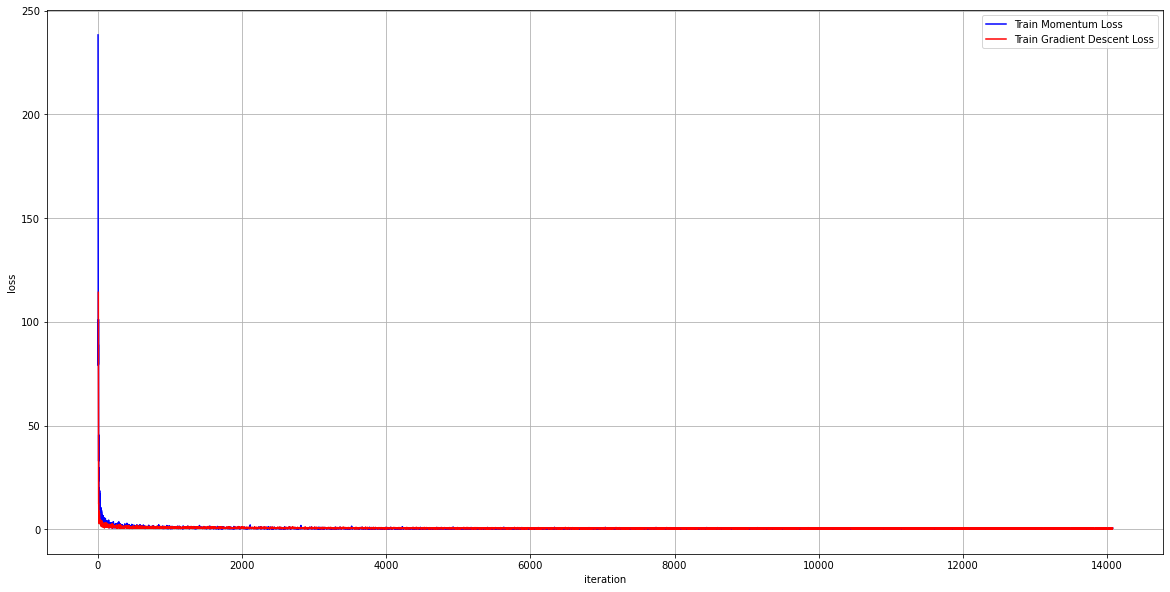

In [51]:
history_mom_ravel_train = np.array(history_train_mom).ravel()
history_gd_ravel_train = np.array(history_train_gd).ravel()
total_iter = list(range(len(history_mom_ravel_train)))
plt.figure(figsize=(20,10))
plt.plot(total_iter, history_mom_ravel_train, 'b', total_iter, history_gd_ravel_train, 'r')
plt.grid()
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend(['Train Momentum Loss', 'Train Gradient Descent Loss'], loc='best')

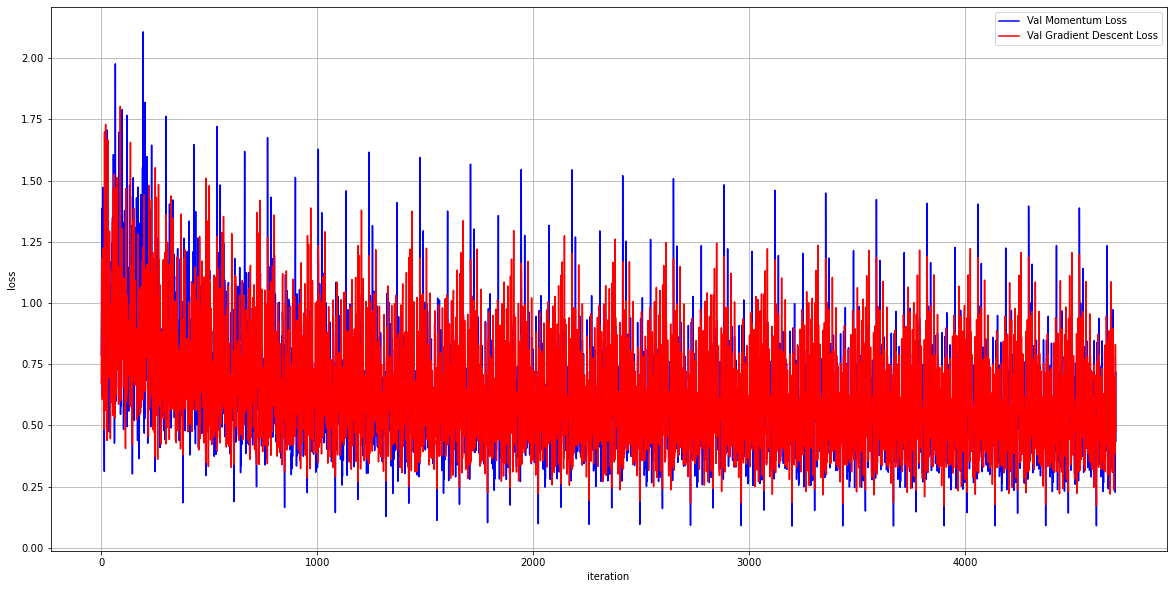

In [52]:
history_mom_ravel_val = np.array(history_val_mom).ravel()
history_gd_ravel_val = np.array(history_val_gd).ravel()
total_iter = list(range(len(history_gd_ravel_val)))
plt.figure(figsize=(20,10))
plt.grid()
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(total_iter, history_mom_ravel_val, 'b', total_iter, history_gd_ravel_val, 'r')
plt.legend(['Val Momentum Loss', 'Val Gradient Descent Loss'], loc='best')

In [53]:
model_2.append(Softmax())
model_1.append(Softmax())

In [54]:
def predict(model, X):
    return np.argmax(model.predict_proba(X), axis=1)

In [55]:
y_val_label = encoder.inverse_transform(y_val).reshape(-1)

In [56]:
print(classification_report(y_val_label, predict(model_1, X_val)))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1536
           1       0.97      0.95      0.96      1517
           2       0.72      0.72      0.72      1464
           3       0.86      0.83      0.84      1504
           4       0.69      0.75      0.72      1535
           5       0.92      0.91      0.92      1468
           6       0.57      0.55      0.56      1503
           7       0.91      0.90      0.90      1499
           8       0.94      0.92      0.93      1503
           9       0.91      0.95      0.93      1471

    accuracy                           0.83     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.83      0.83      0.83     15000



In [57]:
print(classification_report(y_val_label, predict(model_2, X_val)))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1536
           1       0.97      0.96      0.96      1517
           2       0.75      0.73      0.74      1464
           3       0.89      0.80      0.84      1504
           4       0.70      0.81      0.75      1535
           5       0.93      0.92      0.92      1468
           6       0.66      0.56      0.61      1503
           7       0.93      0.88      0.90      1499
           8       0.94      0.92      0.93      1503
           9       0.89      0.96      0.93      1471

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000



## Soal 4  
### Analisis (10 poin)
1. Jelaskan secara singkat analisis Anda terhadap hasil klasifikasi neural network yang didapatkan
2. Jelaskan secara singkat perbedaan hasil evaluasi dari penggunaan momentum optimizer dan Gradient descent optimizer yang didapatkan pada hasil klasifikasi di atas dan mengapa perbedaan tersebut bisa terjadi

### Jawaban

1. Terlihat bahwa nilai akurasi, precision, recall, dan f1-score model yang menggunakan momentum optimzer lebih baik daripada model yang menggunakan gradient descent optimizer, walaupun tidak terlalu jauh. Untuk setiap kelas label, nilai f1-score model MOM lebih baik daripada model GD.

2. optimzer Momentum lebih cepat mendekati weights optimal daripada optimzer GD. hal ini terlihat ketika berada epoch ke 5, model dengan MOM nilai training loss nya sudah 0.49, sedangkan model dengan GD masih 0.56. hal ini mengakibatkan akurasi dan f1-score model dengan MOM lebih baik daripada model dengan GD 